In [1]:
# Imports
%pylab inline
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('../../src/')
from plothelpers import *
from LateralInhibitionNamingGame import *
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# Preprocess

In [5]:
strategies = {
    'minimal':   dict(d_init=1, d_inc=0, d_inh=1, d_dec=0),
    'frequency': dict(d_init=1, d_inc=1, d_inh=0, d_dec=0),
    'simple_li': dict(d_init=1, d_inc=1, d_inh=1, d_dec=0),
    'li':        dict(d_init=.5, d_inc=.1, d_inh=.2, d_dec=.2)
}

In [6]:
# Preprocess data
values, cols = [], []
for strategy in strategies:
    res = load_LING_simulation('../../results/LING01/', f'LING01-{strategy}')
    for quantity in ['num_unique_words', 'num_words', 'successes']:
        values.append(res[quantity].mean(axis=0))
        values.append(res[quantity].std(axis=0))
        cols.append([strategy, quantity, 'mean'])
        cols.append([strategy, quantity, 'std'])

# Pd dataframe
df = pd.DataFrame(array(values).T)
df.columns = pd.MultiIndex.from_tuples(cols)
df.to_csv('LING01-plotdata.csv')

# Plot

In [2]:
# Read all data
data = pd.read_csv('LING01-plotdata.csv', header=[0,1,2], index_col=0)
params = json.load(open('LING01-params.json', 'r'))

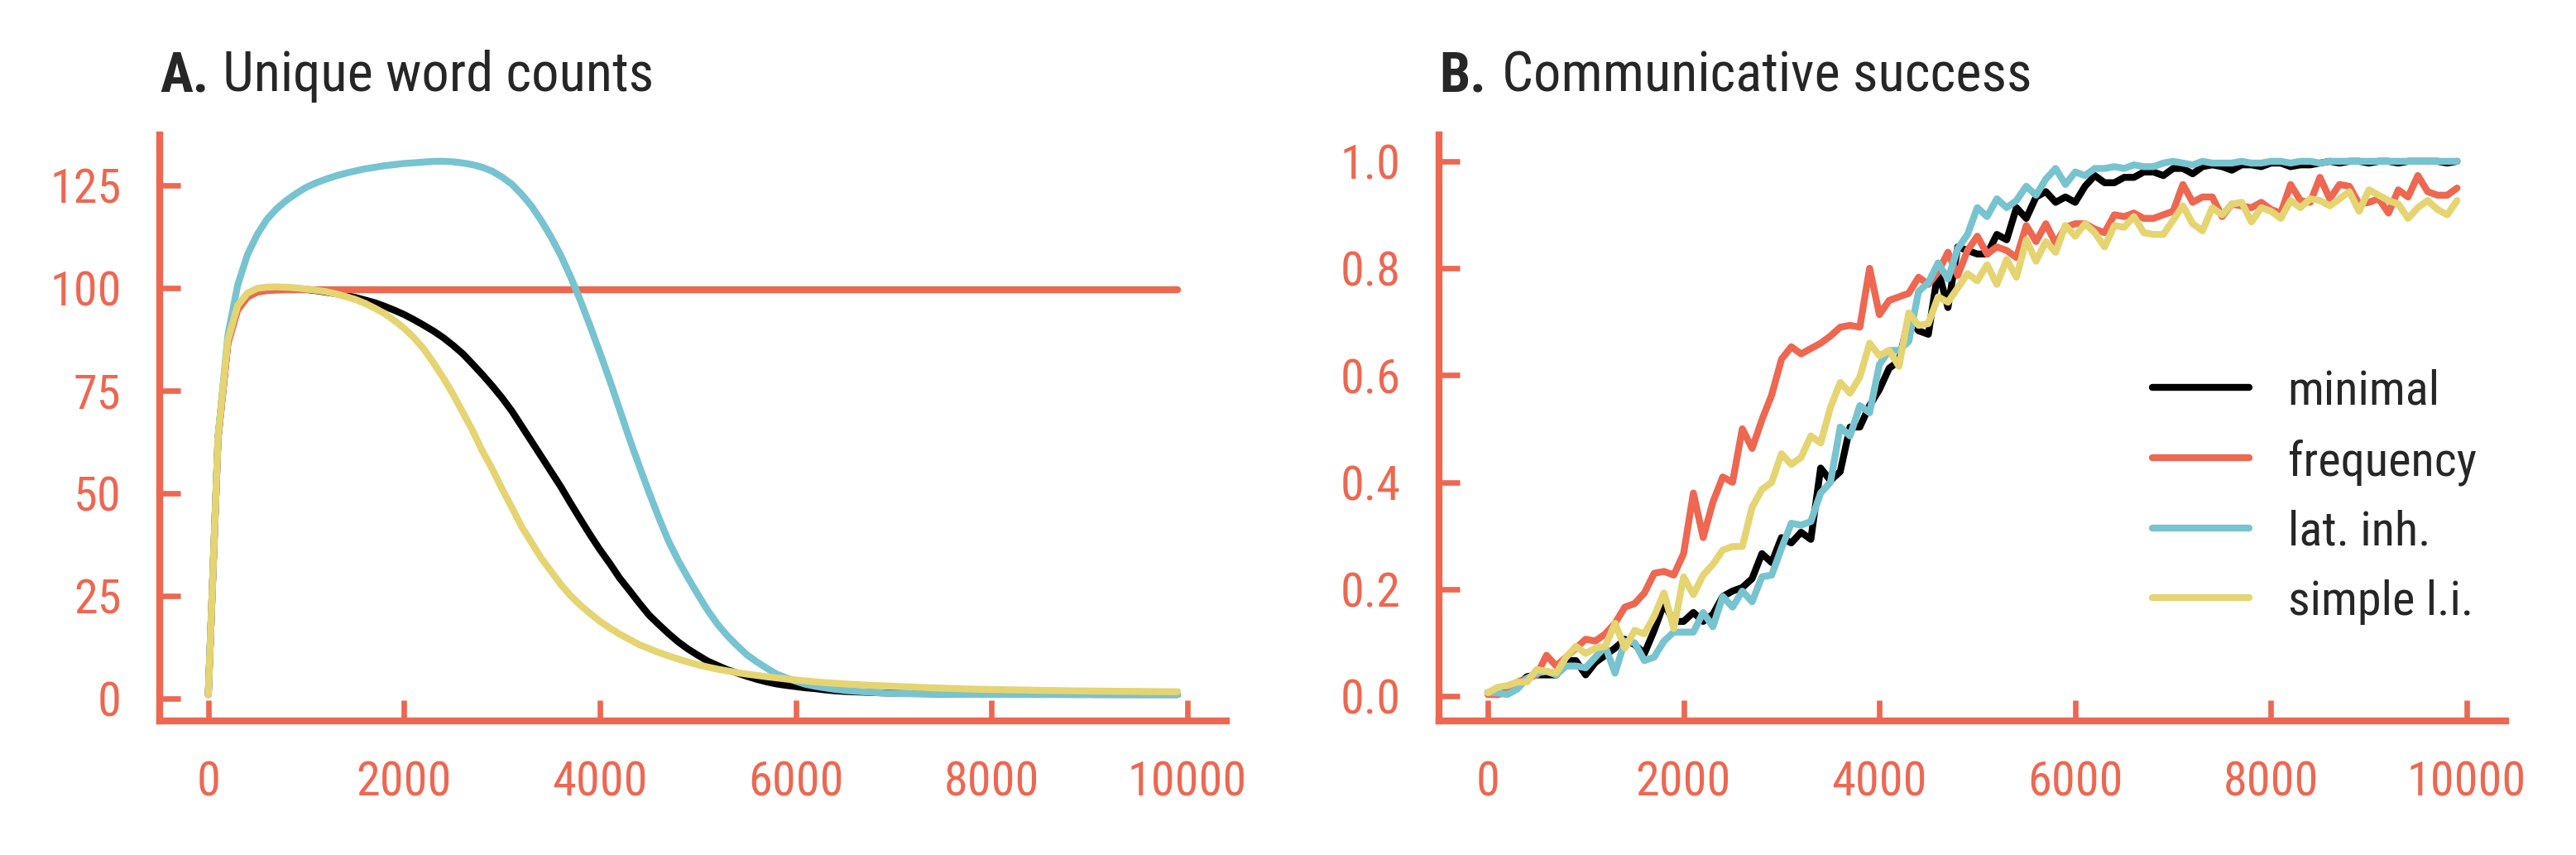

In [3]:
# plot
figure(figsize=cm2inch(12,3))
xs = arange(0, params['T'], params['res'])

names = dict(
    minimal = 'minimal',
    frequency  = 'frequency',
    li     = 'lat. inh.',
    simple_li='simple l.i.')

dashes=dict(
    minimal=(1,1),
    simple_li=(),
    frequency=(4,2),
    li=(4,2,1,2)
)

ax1 = subplot(121)
for strategy in names.keys():
    mean = data[strategy]['num_unique_words']['mean']
    std = data[strategy]['num_unique_words']['std']
    plot(xs, mean, label=names[strategy])   
title('Unique word counts')

ax2 = subplot(122)
for strategy in names.keys():
    mean = data[strategy]['successes']['mean']
    std = data[strategy]['successes']['std']
    color = 'k' if strategy != 'current' else '#ed6751'
    plot(xs, mean, label=names[strategy])
    
legend(bbox_to_anchor=(1,.65))
title('Communicative success')

restyle_title(ax1, ax2)
sns.despine()
subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('LING01-results.pdf', bbox_inches='tight')
copyfig('LING01-results.pdf')